In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
 

In [2]:
df = pd.read_csv('LengthOfStay.csv')
df.drop(columns=['eid', 'vdate', 'discharged', 'facid'], inplace=True)
df = pd.get_dummies(df)
df

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,...,secondarydiagnosisnonicd9,lengthofstay,rcount_0,rcount_1,rcount_2,rcount_3,rcount_4,rcount_5+,gender_F,gender_M
0,0,0,0,0,0,0,0,0,0,0,...,4,3,True,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,1,7,False,False,False,False,False,True,True,False
2,0,0,0,0,0,0,0,0,0,0,...,2,3,False,True,False,False,False,False,True,False
3,0,0,0,0,0,0,0,0,0,0,...,1,1,True,False,False,False,False,False,True,False
4,0,0,0,1,0,1,0,0,0,0,...,2,4,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,1,6,False,False,False,True,False,False,False,True
99996,0,0,0,0,0,0,0,0,0,0,...,1,1,True,False,False,False,False,False,False,True
99997,0,0,1,0,0,0,0,0,0,0,...,1,4,False,True,False,False,False,False,False,True
99998,0,0,0,0,0,0,1,0,0,0,...,1,4,True,False,False,False,False,False,False,True


In [3]:
df.columns

Index(['dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',
       'lengthofstay', 'rcount_0', 'rcount_1', 'rcount_2', 'rcount_3',
       'rcount_4', 'rcount_5+', 'gender_F', 'gender_M'],
      dtype='object')

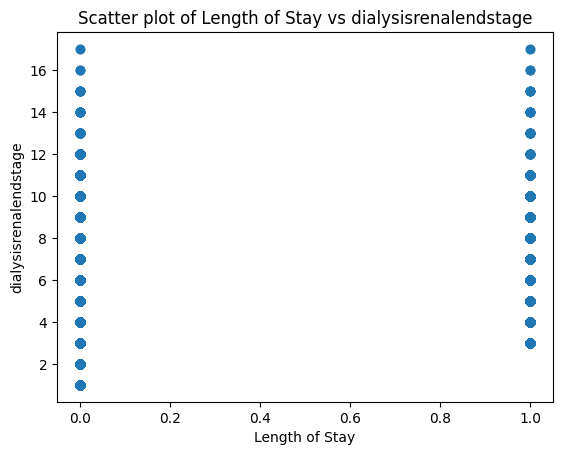

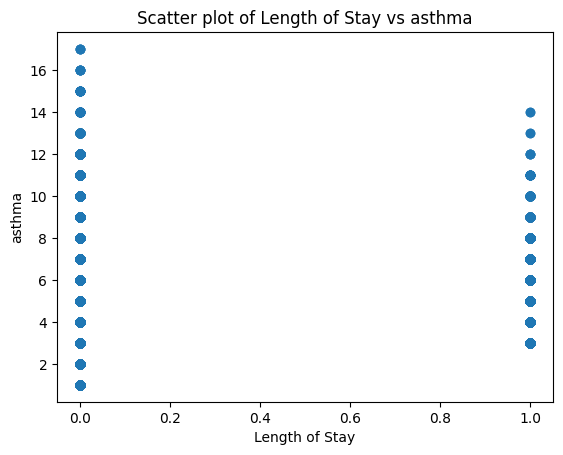

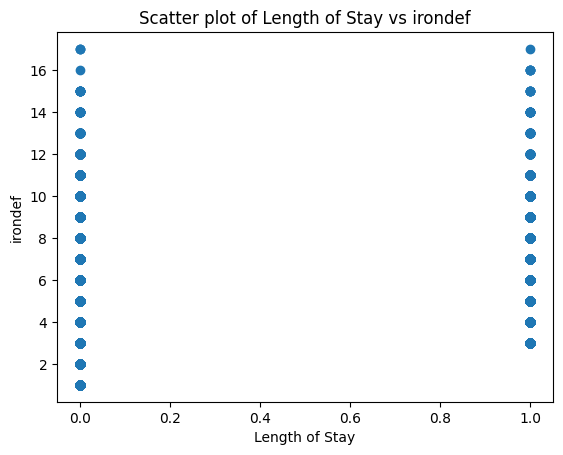

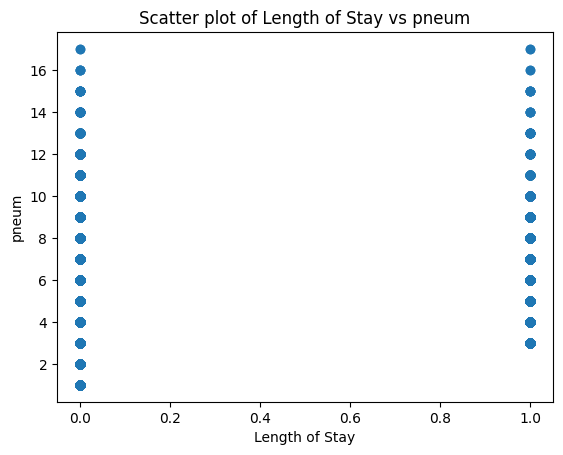

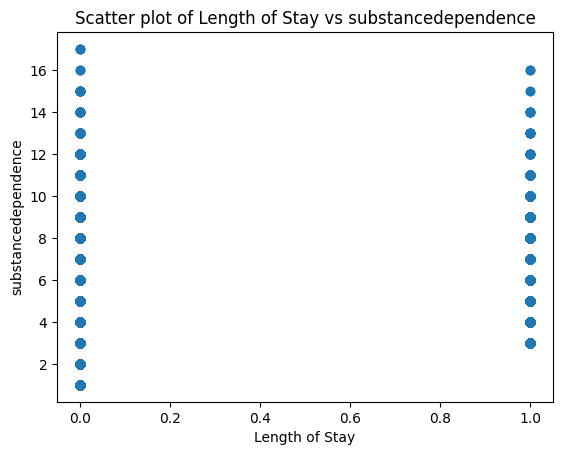

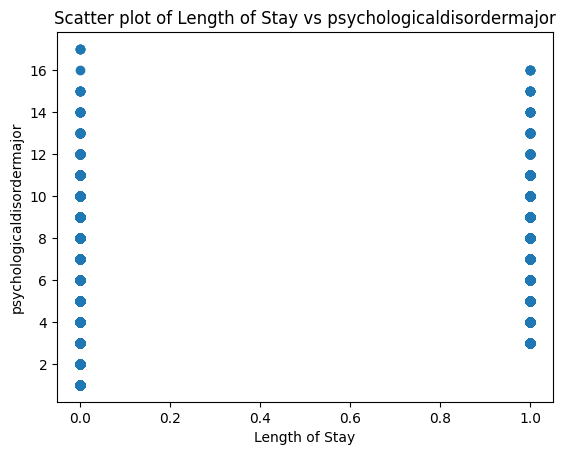

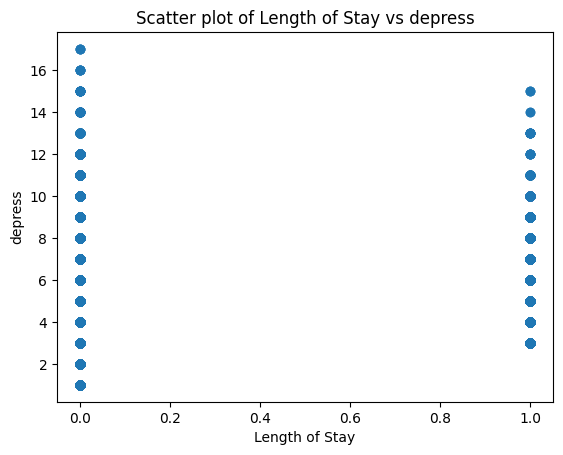

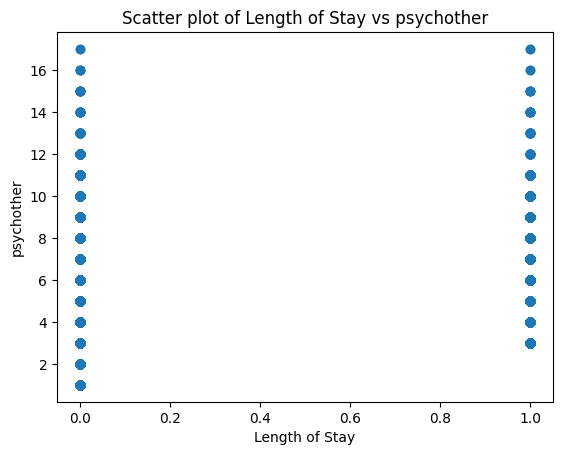

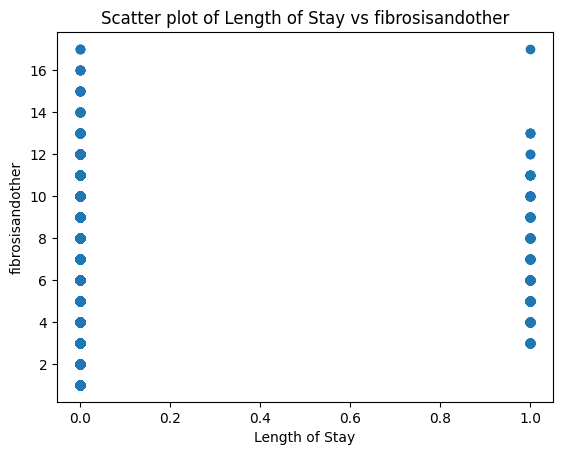

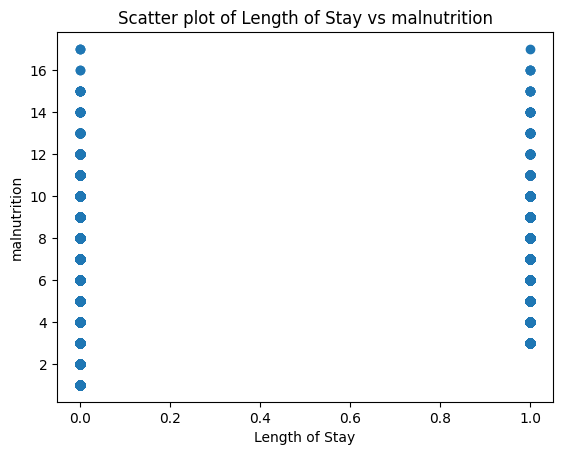

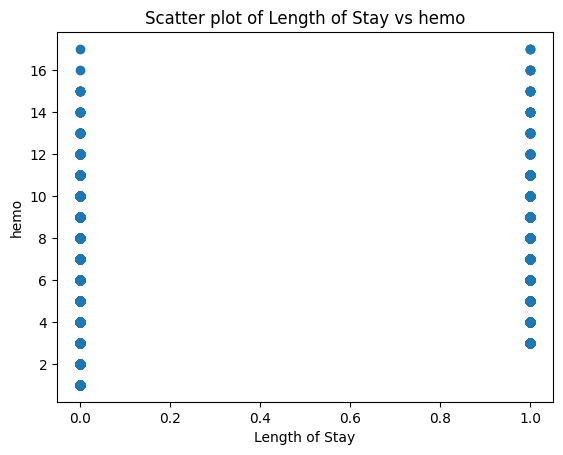

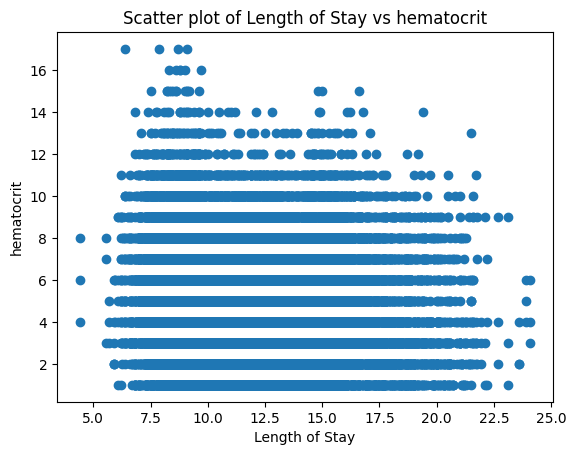

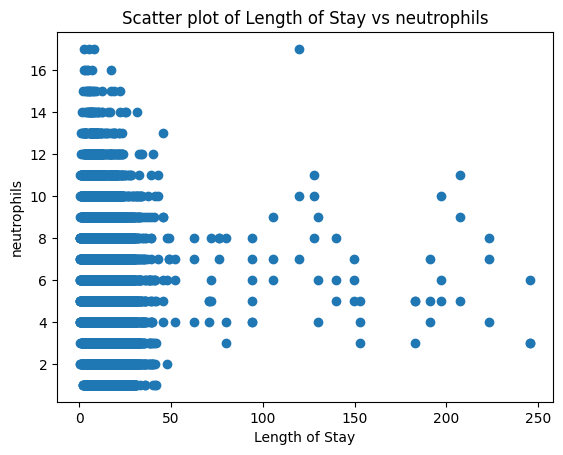

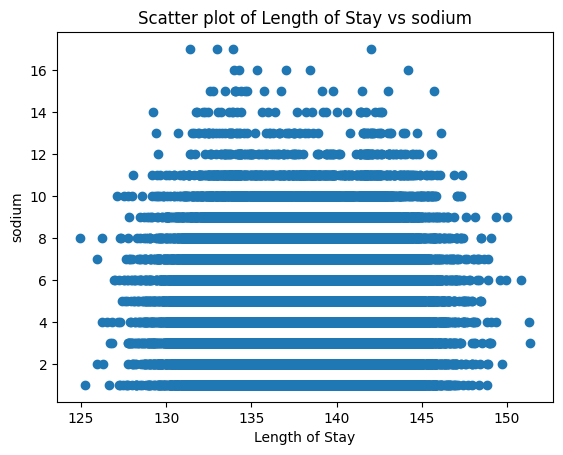

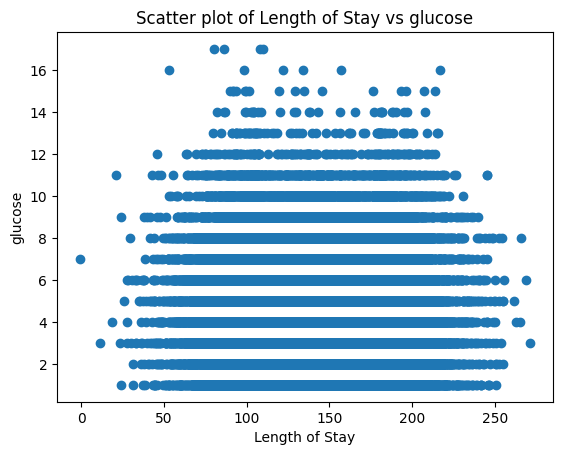

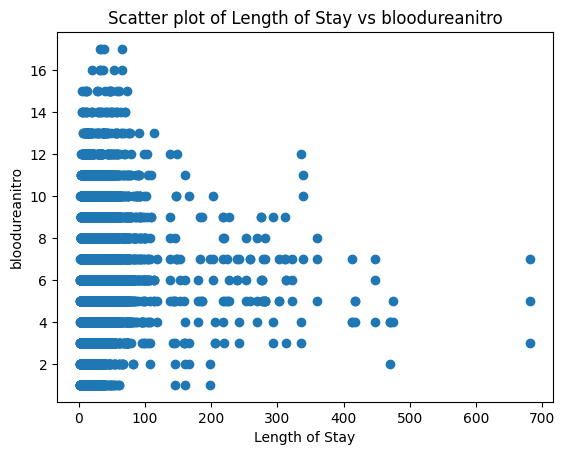

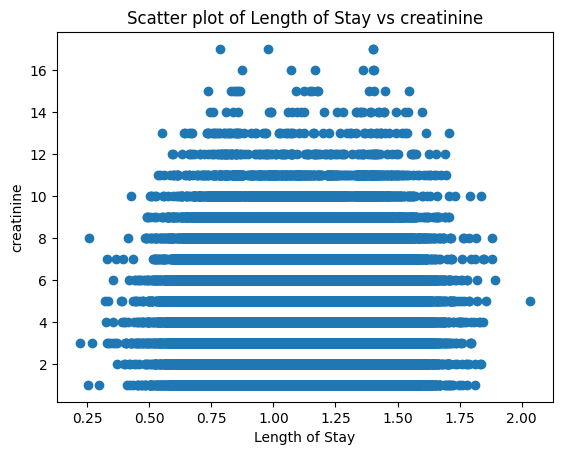

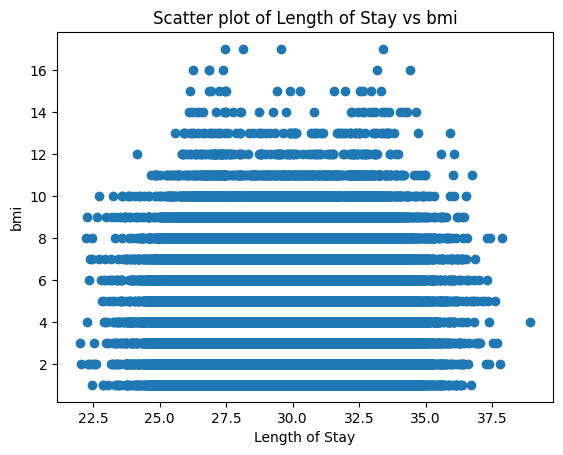

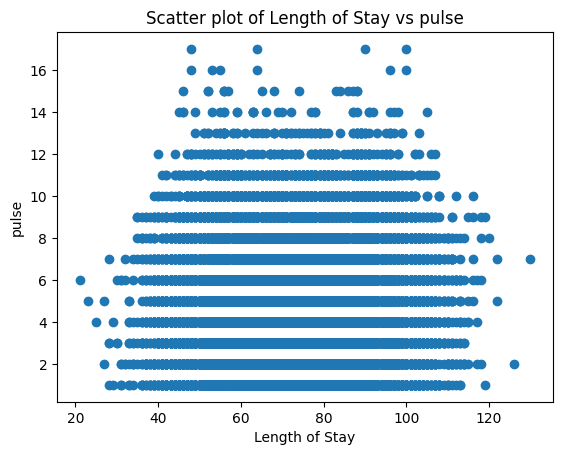

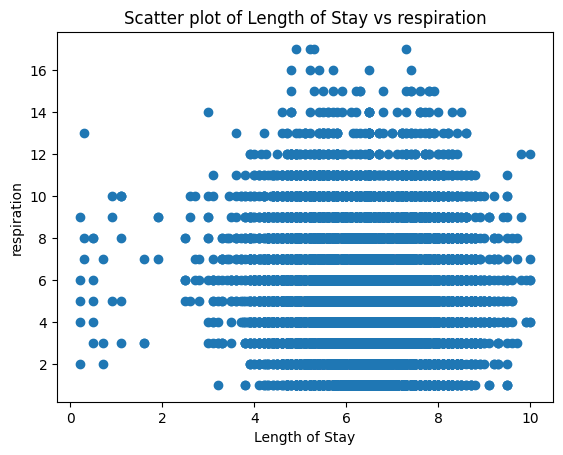

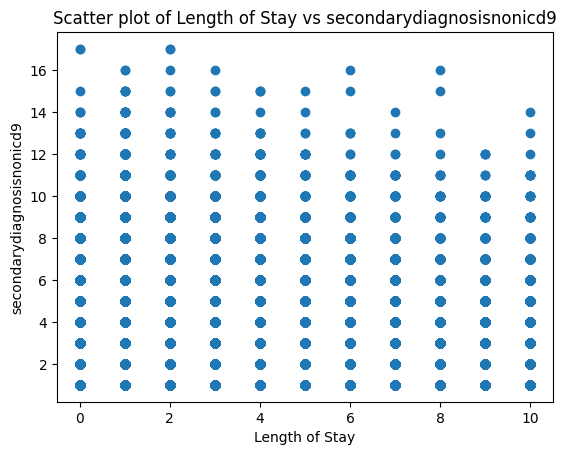

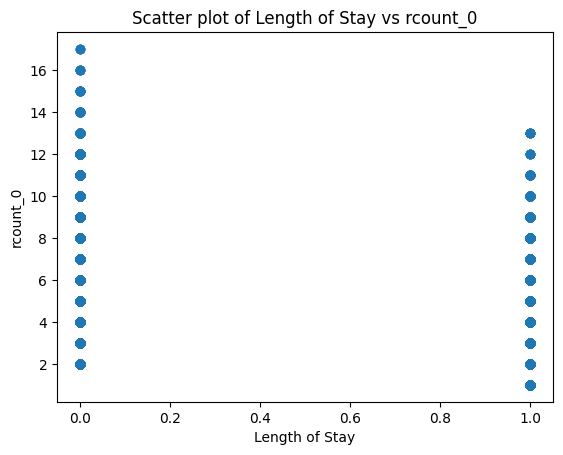

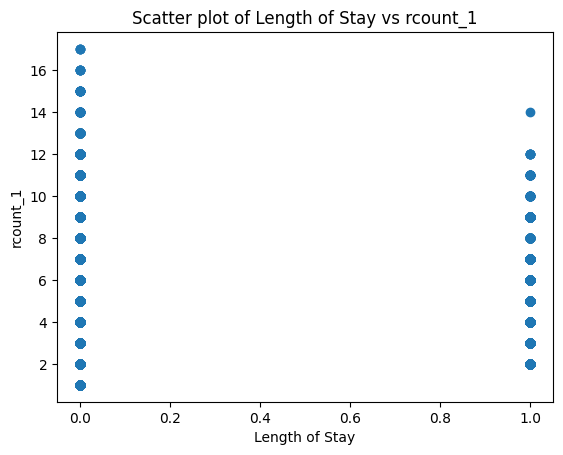

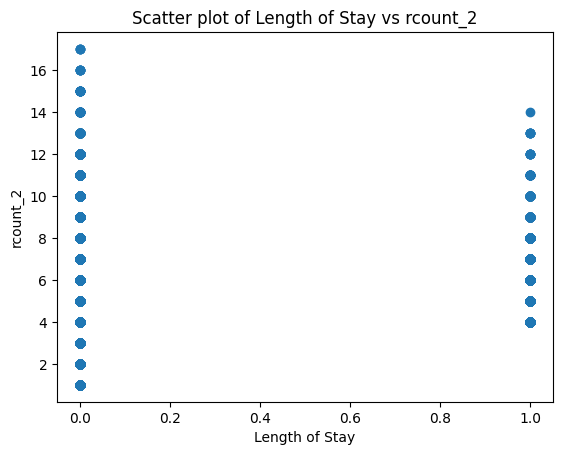

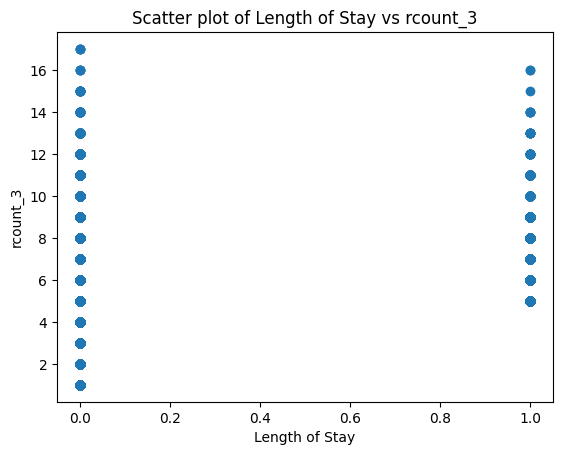

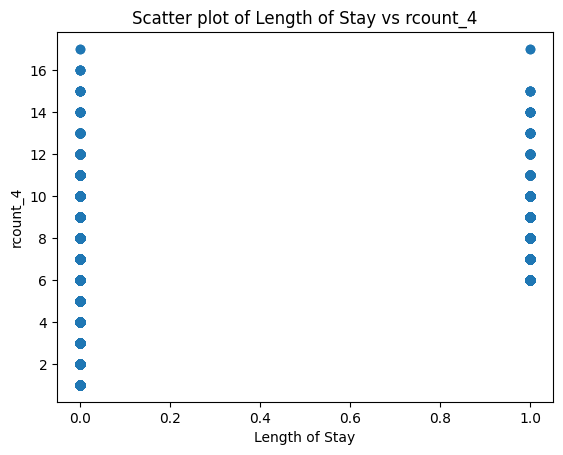

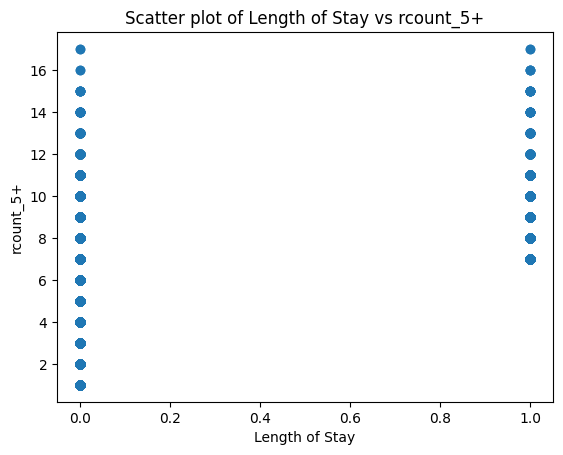

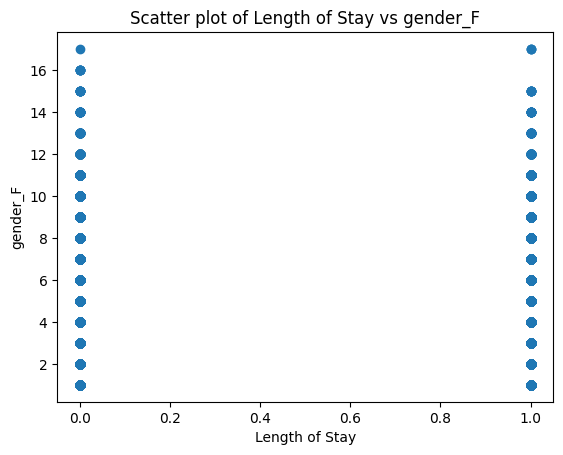

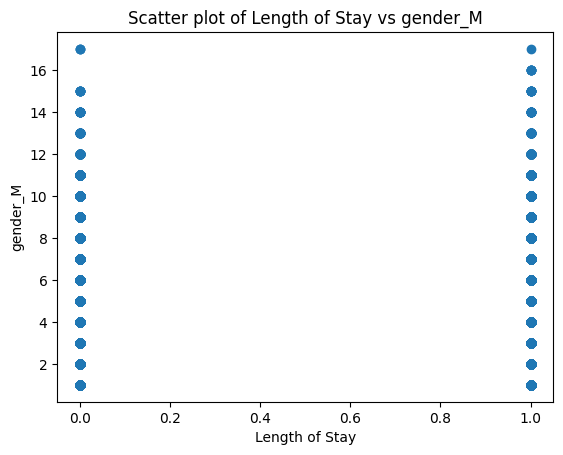

In [4]:
# Make scatter plots of length of stay against each feature
for col in df.columns:
    if col != 'lengthofstay':
        plt.scatter(df[col], df['lengthofstay'])
        plt.xlabel('Length of Stay')
        plt.ylabel(col)
        plt.title(f'Scatter plot of Length of Stay vs {col}')
        plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['lengthofstay']), df['lengthofstay'], test_size=0.2, random_state=42)

In [6]:
gbm_model = GradientBoostingRegressor(learning_rate = 0.1)
gbm_model.fit(x_train, y_train)
gbm_score = gbm_model.score(x_test, y_test)
print(f'Gradient Boosting Regressor Score: {gbm_score * 100:.2f}%')

Gradient Boosting Regressor Score: 92.45%


In [7]:
forest_model = RandomForestRegressor(n_estimators = 100)
forest_model.fit(x_train, y_train)
forest_score = forest_model.score(x_test, y_test)
print(f'Forest Regressor Score: {forest_score * 100:.2f}%')

Forest Regressor Score: 92.69%


In [8]:
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train)
xgboost_score = xgboost_model.score(x_test, y_test)
print(f'XGBoost Regressor Score: {xgboost_score * 100:.2f}%')

XGBoost Regressor Score: 96.24%
